# Homework 5: Confidence Intervals, Autograders, Freethrows
***

**Name**: Matthew Sredojevic 

***

This assignment is due on Moodle by **5pm on Friday April 6th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [3]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats
%matplotlib inline

### [20 points] Problem 1 - Alcohol Content of Red vs White Wine 
***

Load the data in $\texttt{winequality-red.csv}$ and $\texttt{winequality-white.csv}$ into Pandas DataFrames.  A description of this dataset can be found on [Berkeley's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The characteristic that we'll be interested in is the wine's alcohol content.  

In [47]:
RedQualityDF = pd.read_csv("data/winequality-red.csv", sep=";")
WhiteQualityDF = pd.read_csv("data/winequality-white.csv", sep=";")


**Part A**: Are we justified in using the assumptions of the Central Limit Theorem in our analysis of estimates of the mean of the data?  Justify your response. 

In [14]:
np.mean(RedQualityDF["alcohol"])

10.422983114446502

Yes we are justified using the central limit theorm for this analysis because the dataset is over 30 unique points

**Part B**: Compute a 95% confidence interval for the mean of the red wine's alcohol content.  Separately, compute a 95% confidence interval for the mean of the white wine's alcohol content. Do all computations in Python. 

In [55]:
sigmaRed, meanRed = np.std(RedQualityDF["alcohol"]), np.mean(RedQualityDF["alcohol"])
redIntervalMin, redIntervalMax = stats.norm.interval(.9, loc=meanRed, scale=(sigmaRed/np.sqrt(len(RedQualityDF))))

sigmaWhite, meanWhite = np.std(WhiteQualityDF["alcohol"]), np.mean(WhiteQualityDF["alcohol"])
whiteIntervalMin, whiteIntervalMax = stats.norm.interval(.9, loc=meanWhite, scale=(sigmaWhite/np.sqrt(len(WhiteQualityDF))))
print ("This Confidence interl for Red wine is between:", redIntervalMin, "and", redIntervalMax)

print ("This Confidence interl for White wine is between:", whiteIntervalMin, "and", whiteIntervalMax)

This Confidence interl for Red wine is between: 10.3791614433 and 10.4668047856
This Confidence interl for White wine is between: 10.4853470871 and 10.5431870084


**Part C**: Compute the 95% confidence interval for the difference between the means of the alcohol content of red and white wine. 

In [287]:
variance = np.sqrt((sigmaRed**2)/len(RedQualityDF["alcohol"]) + (sigmaWhite**2)/len(WhiteQualityDF["alcohol"]))
z = stats.norm.ppf(.975) #(1-.95)/2 = .025 (the other number used .975 for its positive counterpart)
meanDiff = meanWhite-meanRed
lBound = meanDiff + variance*z
rBound = meanDiff - variance*z
print (lBound, " ", rBound)

0.153846682165   0.028721184491


**Part D**: Interpret the confidence interval you computed in **Part C** in one or two sentences.  Can you say that it's likely that there is a difference in mean alcohol content between red and white wine?  

Visually, the interval is very small so for the average college attendee there is not really a differece in average alcohol content. **HOWEVER**, because the confidence interval does not pass 0, then there is a statistically significant difference, so they are not the same

**HOWEVER** its wine and like, ill get just a drunk regardless

### [15 points] Problem 2: Election Polling
***

On the eve of an important senate seat election, a pollster polls a simple random sample of the population and asks which candidate they plan to vote for on the following day. In particular, the pollster asks if the respondents plan to vote for Candidate A, Candidate B, or some other candidate.  The results of the poll can be found in the following table: 

\begin{array}{ccc}
\hline 
\textrm{Candidate A} & \textrm{Candidate B} & \textrm{Other} \\
\hline 
1204 & 1099 & 205  \\
\hline 
\end{array}

**Part A**: Poll results are typically reported as a predicted **percentage** of the electorate plus or minus a margin of error, i.e. $\texttt{percentage} \pm \texttt{margin}$.  Express the poll results for Candidates A and B in the specified format at the 95% confidence level. 

In [288]:
# z = stats.norm.ppf(.99)
CanApHat = 1204/2508
AMargin = z*np.sqrt(CanApHat*(1-CanApHat)/2508)
# CanAHigh=CanApHat + z*np.sqrt(CanApHat*(1-CanApHat)/2508)
# CanALow =CanApHat - z*np.sqrt(CanApHat*(1-CanApHat)/2508)
print ("The confidence level for candidate A is:", CanApHat, "±", AMargin)

CanBpHat = 1099/2508
BMargin = z*np.sqrt(CanBpHat*(1-CanBpHat)/2508)
# CanBHigh=CanBpHat + z*np.sqrt(CanBpHat*(1-CanBpHat)/2508)
# CanBLow =CanBpHat - z*np.sqrt(CanBpHat*(1-CanBpHat)/2508)
print ("The confidence level for candidate B is:", CanBpHat, "±", BMargin)

The confidence level for candidate A is: 0.4800637958532695 ± 0.0195527943236
The confidence level for candidate B is: 0.4381977671451356 ± 0.0194182968335


**Part B**: Express the poll results as 95% confidence intervals.  Based on these results, would it be responsible for a newspaper to definitely call the election for a particular candidate? Clearly justify your response. 

In [120]:
CanOpHat = 205/2508
OMargin = z*np.sqrt(CanOpHat*(1-CanOpHat)/2508)
# CanOHigh=CanOpHat + z*np.sqrt(CanOpHat*(1-CanOpHat)/2508)
# CanOLow =CanOpHat - z*np.sqrt(CanOpHat*(1-CanOpHat)/2508)
print ("The confidence level for other candidates is:", CanOpHat, "±", OMargin)

The confidence level for other candidates is: 0.0817384370015949 ± 0.0107221207118


Just by even looking at the data, it can be seen that Candidate A has won the election. Their margin of error is small enough that it does not reach the end of Candidate B's range.

**Part C**: In the run-up to the next election, the pollster is designing a poll of a city council race between two relatively unknown candidates.  Without having any prior data, how many respondents does the pollster need responses from to guarantee that she will get at most a 2% margin of error at the 95% confidence level? Be sure to **clearly** justify your reasoning.  

**Hint**: Recall that when computing a confidence interval for proportion we use the actual sample proportion to approximate the variance.  How can you get a worst-case scenario estimate of the variance when the sample proportion is not known _a priori_? 


MoE = Z *sqrt( P(1-P) /n)

The only thing we can assume is that the variance is as large as possible so how we end up with that is with a Proportion for a given candidate to be .5

In [133]:
p = .5
z = stats.norm.ppf(.975)
MoE = .02
pop = np.ceil(p*(1-p)*(z**2)/(MoE**2))
print("The number of needed respondents is:", pop)

The number of needed respondents is: 2401.0


if you would like to see how i felt going through this hm, examine the next cell

<html>
<!--     <img src="https://i.imgur.com/TrymOlU.jpg", width="40%"> -->
    
</html>

### [15 points] Problem 3 - Have Opinions on Marijuana Legalization Changed? 
***

The General Social Survey (GSS) has been collecting demographic, behavioral, and attitudinal information since 1972 to monitor changes within the US and to compare the US to other nations. Support for the legalization of marijuana in the US is shown for 2010 and in 2016 in the following table:


\begin{array}{cccc}
\hline
\textrm{Year} & \textrm{Favor} & \textrm{Oppose} & \textrm{Total} \\ 
\hline
\textrm{2010} & \textrm{603} & \textrm{656} & \textrm{1259} \\
\textrm{2016} & \textrm{1126} & \textrm{717} & \textrm{1843} \\
\hline
\end{array}


**Part A**: Find a 95% confidence interval for the change in the proportion supporting marijuana legalization from 2010 to 2016. Use Python for all computations and show your work. 

In [174]:
Fav2010 = 603/1259
Fav2016 = 1126/1843
# Op2016 = 717/1843 #we dont care about this? because its the proportion SUPPORTING mary jane
z = stats.norm.ppf(.975)

Fav2 = z * np.sqrt((Fav2010*(1-Fav2010)/1259)+(Fav2016*(1-Fav2016)/1843))

print (Fav2)

0.0354523989212


**Part B**: Is it likely that the proportion supporting marijuana legalization changed between 2010 and 2016? Justify your conclusion using the ideas of statistical inference and your results from **Part A**. 

Well theres certainly a larger seperation here with the CI's but i think i shouldnt be looking at the mean. I feel like Dan said something about that and i should look at not the mean here, but the variance? and see that there isnt much difference or something?

### [20 points] Problem 4 - Exploring Confidence Intervals 
***

The so-called [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution is important in several statistical tests.  It's also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [chi2](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chi2.html). 


In [123]:
from scipy.stats import chi2

**Part A**: Complete the following code cell to plot a histogram of realizations from the Chi-squared distribution with parameter $K=3$. 

(array([ 250.,  453.,  451.,  496.,  535.,  520.,  505.,  481.,  435.,
         426.,  400.,  349.,  343.,  333.,  329.,  303.,  274.,  262.,
         235.,  205.,  194.,  176.,  160.,  156.,  156.,  123.,  122.,
         123.,   97.,   89.,   98.,   88.,   79.,   71.,   69.,   47.,
          38.,   47.,   34.,   46.,   29.,   34.,   36.,   32.,   17.,
          21.,   12.,   14.,   22.,   12.,   14.,   15.,   12.,    8.,
          11.,    9.,    8.,    4.,    6.,    5.,    6.,    7.,    8.,
           2.,    3.,    5.,   10.,    4.,    2.,    7.,    0.,    1.,
           4.,    4.,    0.,    0.,    0.,    2.,    1.,    2.,    0.,
           2.,    1.,    2.,    1.,    0.,    1.,    0.,    1.,    1.,
           0.,    1.,    0.,    2.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  4.06376983e-03,   2.11365075e-01,   4.18666381e-01,
          6.25967686e-01,   8.33268991e-01,   1.04057030e+00,
          1.24787160e+00,   1.45517291e+00,   1.66247421e+00,
          1.86977552e+00

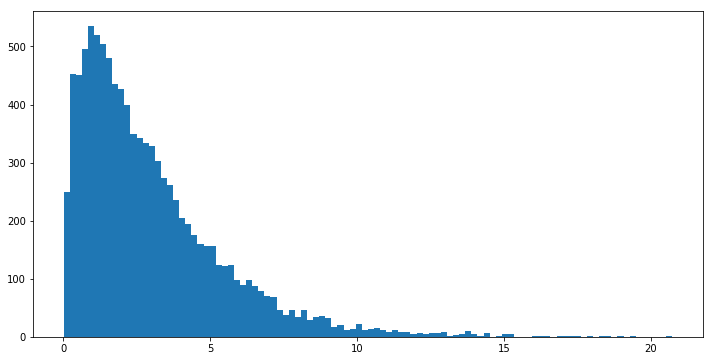

In [132]:
k = 3 
x = chi2.rvs(k, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
plt.hist(x, bins=100)

**Part B**: Look up the mean and variance of the Chi-squared distribution with parameter $k=3$ and report them here. 

The calculation for the mean is just k and the calculation for variance is just 2k

So what we end up with is just, Mean = 3 and Variance = 6

**Part C**: In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Chi-squared distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Chi-squared distribution with parameter $k=3$.  For each random sample, compute the 95% confidence interval for the mean.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\mu$ where $\mu$ is the true mean of the distribution. Color confidence intervals black if they cover the true mean, and red if they don't.  

0.94


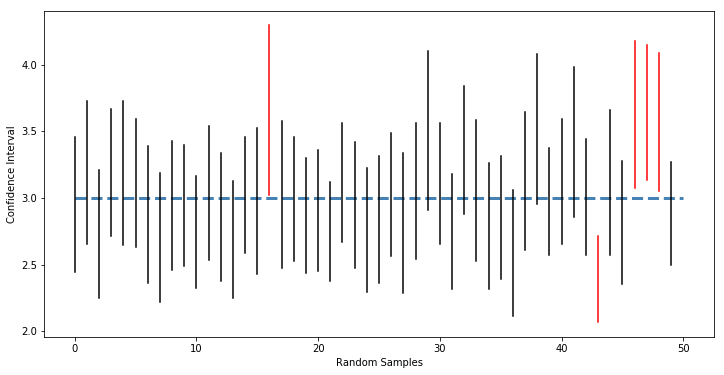

In [271]:
def confidence_intervals(m=500, n=100):
    k=3
    intervals = []
    counter = 0
    for ii in range (m):
        z = stats.norm.ppf(.975)
        chi = chi2.rvs(k,size=n)
        mean = np.mean(chi)
        sigma = np.std(chi)
        se = z*sigma/np.sqrt(n)
        interval = mean - se, mean+se
        intervals.append(interval)
        if interval[0] < k and interval[1] > k:
            counter +=1
    print(counter/len(intervals))
    
    fChoice = np.random.choice(m, 50, replace=False)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    ax.plot([0,50], [k,k], color="steelblue", ls='--', lw=3)
    plt.xlabel("Random Samples")
    plt.ylabel("Confidence Interval")
    
    for i, index in enumerate(fChoice):
        interv = intervals[index]
        color = 'red'
        if interv[0]<=k<=interv[1]:
            color = 'black'
        ax.plot([i,i],[interv[0],interv[1]], color=color)
              
        

confidence_intervals()  

**Part D**: Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

I STILL NEED TO DO THIS :D

### [15 points] Problem 5 - Autograding Simulation Homework 
***

Suppose that you are the grader for an Introduction to Data Science course and your boss has asked you to write an autograder for a homework problem on simulation.  Specifically, students have been asked to write a simulation to estimate the expected number of rolls it will take until doubles are rolled with a pair of fair, six-sided dice (i.e. until both dice show the same value).  The students have been asked to structure their code so that it runs many trials of the experiment and returns the sample mean of the trials, as well as an array containing the result of each individual trial. 

The solutions submitted by three students in the course are given below. 

In [194]:
def student1(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 0
        while np.random.choice([1,2,3,4,5,6]) != np.random.choice([1,2,3,4,5,6]):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student2(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 1
        while int(6*np.random.uniform(0,1)+1) != int(6*np.random.uniform(0,1)+1):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student3(num_trials=5000):
    t = np.random.exponential(6, size=num_trials)
    return np.mean(t), t 

Now, you landed this job at the last minute, and your probability theory is a little rusty.  Luckily, your boss has given you his solution to the problem which is shown below: 

In [195]:
def prof(num_trials=5000):
    t = np.random.geometric(1/6, size=num_trials)
    return np.mean(t), t

Knowing that your probability theory is rusty, your boss has suggested that your autograder be constructed solely based on confidence intervals to compare the students' estimates of the expected value of the experiment to his own estimate.  Finally, although there are only examples from three students above, there are actually more than 100 students in the course, so tailoring your tests to features of individual students' code is out of the question. 

**Part A**: Complete the function autograder below, which takes in the realizations of the trials from your professor's code and one of the students' codes, as well as the $\alpha$ for a $100(1-\alpha)\%$ confidence interval and returns a string indicating whether the student passed or failed the test. **Clearly** indicate what statistical test(s) your autograder is using and why this is a good idea.  Then demonstrate the use of your autograder to grade the three student solutions above. 

In [219]:
def autograder(pf, st, alpha=0.05):
    pfMean, pfArray = pf()
    stMean, stArray = st()
    pfSig = np.std(pfArray)
    stSig = np.std(stArray)
    z = stats.norm.ppf(.975)
    
    something = ((pfMean-stMean)+ z * np.sqrt(pfSig**2/len(pfArray) + stSig**2/len(stArray))), ((pfMean-stMean)- z * np.sqrt(pfSig**2/len(pfArray) + stSig**2/len(stArray)))
    if something[1] <0:
        return "Passed"
    else:
        return "Failed"

The statistical test I am doing is a Difference of Means. We know that the professors answer is never wrong(I mean, he GAVE us the solution) so he has the correct answer with a 95% interval so there some 5% chance of variation that someone can be off and still be considered correct. Then, we check to see if a given student is within that interval. If the difference of means confidence interval contains 0 (or one end has a negative while the other is positive) then we know the student has passed.

In [220]:
autograder(prof,student1)

'Failed'

In [221]:
autograder(prof,student2)

'Passed'

In [222]:
autograder(prof,student3)

'Passed'

**[Extra Credit] Part B**: You realize that tests based solely on the estimate of the mean are not robust.  Come up with a better autograder that, again using tests based on confidence intervals, compares the students' solutions to the professor's solutions on statistical properties beyond just the mean. Again, **clearly** motivate the features of your autograder based on theory developed in class.    

### [15 points] Problem 6 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the third Jack.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes. Compute the mean, median, and mode for this dataset, indicate them on the plot too. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

Mean: 31.8386
Median: 32.0
Mode: 29


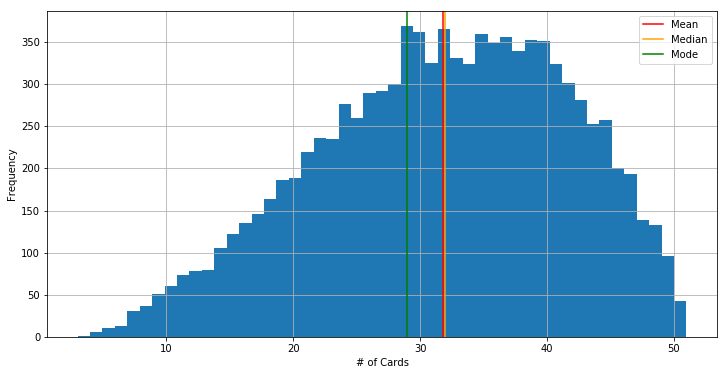

In [292]:
from random import shuffle
# taken from 
# print(deck)
results = []
for i in range(10000):
    deck = [1,2,3,4,5,6,7,8,9,10,11,12,13]*4
    newDeck = deck
    shuffle(newDeck)
    enum = 0
    jackn = 0
    
    while jackn !=3:
        card = newDeck.pop()
        enum+=1
        if card == 11:
            jackn +=1
    
    
#     for j in range(len(newDeck)):
#         card = np.random.choice(newDeck)
#         #whoops not getting rid of cards
#         break
#         enum +=1
#         if card =="J":
#             jackn+=1
#         if jackn == 3:
#             break
    results.append(enum)
mean = np.mean(results)
median = np.median(results)
mode = max(set(results), key=results.count)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.grid(b=True)
plt.xlabel("# of Cards")
plt.ylabel("Frequency")
plt.hist(results,bins=49)
plt.axvline(x= mean, color = "red", label="Mean")
plt.axvline(x= median, color = "orange", label="Median")
plt.axvline(x= mode, color = "green", label="Mode")
plt.legend()
print("Mean:",mean)
print("Median:",median)
print("Mode:",mode)

**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Jerry Ferguson and Steve Ferguson. You prepare to take anotter shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

Yo lil, bro(or sis). So like, I have like 99 percent confidence that you can make this shot. However, My twin Brother Patthew, only has 95 confidence that you can make this shot. So basically I believe in you like ├────────┼────────┤ this much(not to scale, should be bigger)! But Patthew only believes in you ├─────┼─────┤ this much(to actual{not really} scale). Basically I believe in you more and thats why a 99% confidence interval is larger, because 99% of 100 is larger than 95% of 100

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the match. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the standard deviation.
***

In [264]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

In [311]:
durantSigma = np.var(durant)
z = stats.chi2.ppf(.025, len(durant)-1),  stats.chi2.ppf(.975, len(durant)-1)
durantCI = np.sqrt((len(durant)-1)*durantSigma/z[1]), np.sqrt((len(durant)-1)*durantSigma/z[0])

print("The confidence interval of the Variance for the Durant array is from",durantCI[0],"to",durantCI[1])

The confidence interval of the Variance for the Durant array is from 0.074125309028 to 0.196738866543


**Part D**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Maureen Ferguson. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. Ferguson suggests that you do the following CSCI3022 problem:</font>

You collect 53 samples of hair from baby river otters and find that they are, on average, 22.6 mm long, with a standard devaition of 15.2mm. 

Then you collect 41 samples of hair from baby sea otters and find that they are, on average, 26.4 mm long, with a standard deviation of 11.4 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby sea otter hair length exceeds the true mean of baby river otter hair length by more than 3 mm?  Use a test of your choice.

***

In [314]:
RiverN = 53
RiverMean = 22.6
RiverSD = 15.2

SeaN = 41
SeaMean = 26.4
SeaSD = 11.4

xBar = SeaMean - RiverMean
z =(xBar - 3)/np.sqrt((RiverSD**2/RiverN)+(SeaSD**2/SeaN))

1-stats.norm.cdf(z)
stats.norm.ppf(.05)

-1.6448536269514729

The base case: Difference in hair length = 3mm

$H_1$: Difference in Hair lenght > 3mm

So we take the box muller of the two sets of data. and we get a z value of 0.2915555. Then we need to turn that into a 1 tail confidence interval to check if it is in the range of the CI. However, when we take the cdf of 0.2915555, we end up with .3853 which is much larger than the significance level of 0.05 (.3853 > .05) then we do not have the evidence to disprove the base case

**Part E**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


***

The Null hypothesis is that the strength of the carbon is NOT below tolerance, and therefore safe.

type 1 error would show that we said that the plane was unsafe when it was actualy safe

type 2 error would show that we said the plane was safe when it was actually unsafe

You want to have a low type 2 error rate because a type one error means that you send out a broken plane. Where as type two is holding back a working plane. I would rather not use a working plane that use a plane thats not working